In [62]:
import numpy as np 
import pandas as pd
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import seaborn as sns
from IPython.display import display
pd.options.mode.chained_assignment = None
import matplotlib
matplotlib.style.use('ggplot')

In [92]:
tweets = pd.read_csv('/Users/akashjain/Desktop/BigFar Challenge/Twitter Sentiment Analysis/demonetisation.csv', encoding = "ISO-8859-1")


In [93]:
print(tweets.head(3))

   username            date  retweets  favorites  \
0       NaN  12/30/16 09:05         0          0   
1       NaN  12/30/16 07:40         0          0   
2       NaN  12/30/16 05:02         2          1   

                                                text  geo mentions  \
0  Demonetisaton ka Asar #WoW https:// twitter.co...  NaN      NaN   
1  Demonetisaton Effect https:// twitter.com/PTI_...  NaN      NaN   
2  #Demonetisaton D-day https:// twitter.com/Chan...  NaN      NaN   

         hashtags        id  \
0            #WoW  8.15E+17   
1             NaN  8.15E+17   
2  #Demonetisaton  8.15E+17   

                                           permalink Unnamed: 10  
0  https://twitter.com/goeltm_tg/status/814834706...         NaN  
1  https://twitter.com/goeltm_tg/status/814813412...         NaN  
2  https://twitter.com/pierrefitter/status/814773...         NaN  


In [94]:
import re
#Preprocessing del RT @blablabla:
tweets['text_new'] = ''
tweets['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets['text'])):
    try:
        tweets['tweetos'][i] = tweets['text'].str.split(':')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['text'])):
    if tweets['tweetos'].str.contains('RT @')[i]  == False:
        tweets['tweetos'][i] = 'other'

#'text_new' is the feature 'text' without the tweetos    
for i in range(len(tweets['text'])):
    m = re.search('(?<=:)(.*)', tweets['text'][i])
    if tweets['text'].str.contains('RT @')[i]  == True:
        try:
            tweets['text_new'][i]=m.group(0)
        except AttributeError:
            tweets['text_new'][i]=tweets['text'][i] 
    else:       
        tweets['text_new'][i] =  tweets['text'][i]

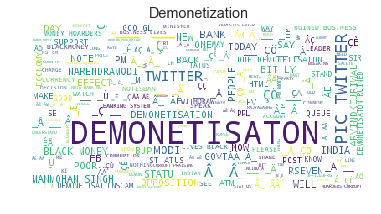

In [95]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_by_province(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets['text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Demonetization")

wordcloud_by_province(tweets) 

In [ ]:
WordCloud

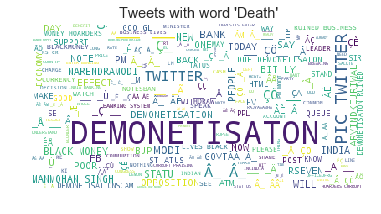

In [99]:
def wordcloud_by_province(tweets):
    a = pd.DataFrame(tweets['text'].str.contains("").astype(int))
    b = list(a[a['text']==1].index.values)
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("death")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets.ix[b,:]['text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tweets with word 'Death'")

wordcloud_by_province(tweets)

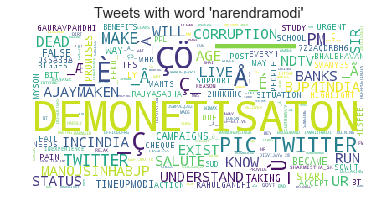

In [98]:
def wordcloud_by_province(tweets):
    a = pd.DataFrame(tweets['text'].str.contains("narendramodi").astype(int))
    b = list(a[a['text']==1].index.values)
    stopwords = set(STOPWORDS)
    stopwords.add("narendramodi")
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets.ix[b,:]['text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tweets with word 'narendramodi'")

wordcloud_by_province(tweets)

In [ ]:
TimeSeries

In [100]:
print(tweets['retweets'].describe())

count    478.000000
mean       4.815900
std       29.931011
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max      482.000000
Name: retweets, dtype: float64


In [101]:
tweets['nb_words'] = 0
for i in range(len(tweets['text'])):
    tweets['nb_words'][i] = len(tweets['text'][i].split(' '))

In [102]:
tweets['hour'] = pd.DatetimeIndex(tweets['date']).hour
tweets['date'] = pd.DatetimeIndex(tweets['date']).date
tweets['minute'] = pd.DatetimeIndex(tweets['date']).minute

In [103]:
tweets_hour = tweets.groupby(['hour'])['retweets'].sum()
tweets_minute = tweets.groupby(['minute'])['retweets'].sum()
tweets['text_len'] = tweets['text'].str.len()
tweets_avgtxt_hour = tweets.groupby(['hour'])['text_len'].mean()
tweets_avgwrd_hour = tweets.groupby(['hour'])['nb_words'].mean()


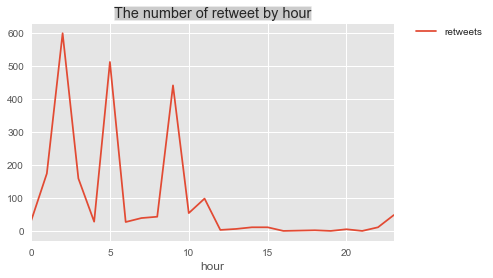

In [104]:
import seaborn as sns
tweets_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of retweet by hour', bbox={'facecolor':'0.8', 'pad':0})

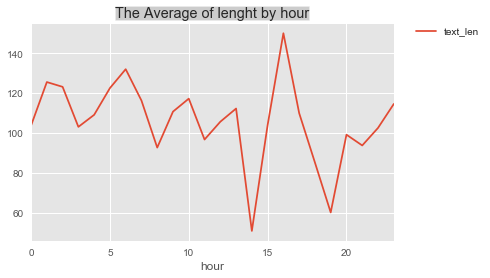

In [105]:
tweets_avgtxt_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The Average of lenght by hour', bbox={'facecolor':'0.8', 'pad':0})

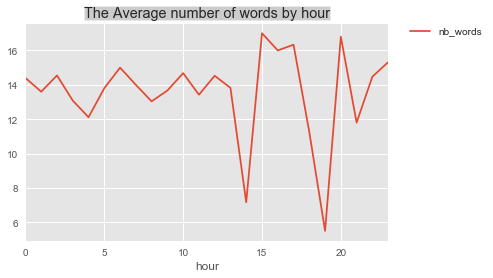

In [106]:
tweets_avgwrd_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The Average number of words by hour', bbox={'facecolor':'0.8', 'pad':0})

In [ ]:
Sentiment Analysis

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
####
from nltk.stem import WordNetLemmatizer
#tweets['text_sep'] = [''.join(z).strip() for z in tweets['text_new']]
tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets['text_new']]       
####
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_lem'].str.upper())
print(X.shape)
#print(tweets['text_sep'])
#print(tweets['text_new'])

(478, 34)


In [108]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,...,nb_words,hour,minute,text_len,text_lem,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,NaN,2016-12-30,0,0,Demonetisaton ka Asar #WoW https:// twitter.co...,NaN,NaN,#WoW,8.15E+17,https://twitter.com/goeltm_tg/status/814834706...,...,8,9,0,91,Demonetisaton ka Asar WoW https twitter co...,0.5859,0.703,0.0,0.297,POSITIVE
1,NaN,2016-12-30,0,0,Demonetisaton Effect https:// twitter.com/PTI_...,NaN,NaN,NaN,8.15E+17,https://twitter.com/goeltm_tg/status/814813412...,...,6,7,0,81,Demonetisaton Effect https twitter com PTI ...,0.0000,1.000,0.0,0.000,NEUTRAL
2,NaN,2016-12-30,2,1,#Demonetisaton D-day https:// twitter.com/Chan...,NaN,NaN,#Demonetisaton,8.15E+17,https://twitter.com/pierrefitter/status/814773...,...,6,5,0,84,Demonetisaton D day https twitter com Chand...,0.0000,1.000,0.0,0.000,NEUTRAL
3,NaN,2016-12-30,0,0,50 days over of #demonetisaton . Calculations ...,NaN,NaN,#demonetisaton #RBI,8.15E+17,https://twitter.com/LogicalSpin/status/8147654...,...,21,4,0,137,days over of demonetisaton Calculations bas...,0.0000,1.000,0.0,0.000,NEUTRAL
4,NaN,2016-12-29,1,0,We know @narendramodi start his campaigns with...,NaN,@narendramodi @GauravPandhi,#TimeUpModi,8.15E+17,https://twitter.com/BaseraMahipal/status/81467...,...,19,22,0,137,We know narendramodi start his campaigns with...,0.3818,0.880,0.0,0.120,POSITIVE


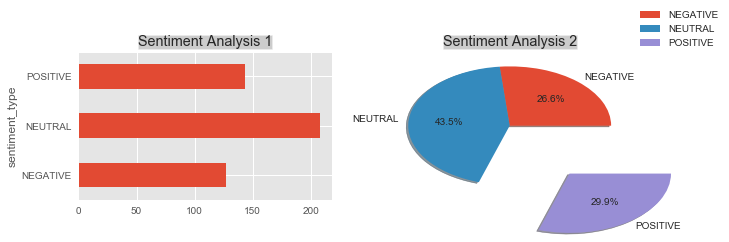

In [109]:
import matplotlib
matplotlib.style.use('ggplot')

tweets_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentiment.rename("",inplace=True)
explode = (0, 0, 1.0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(10, 6))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(10, 6),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

In [110]:
tweets['count'] = 1
tweets_filtered = tweets[['hour', 'sentiment_type', 'count']]
pivot_tweets = tweets_filtered.pivot_table(tweets_filtered, index=["sentiment_type", "hour"], aggfunc=np.sum)

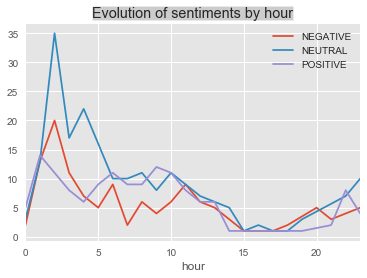

In [111]:
sentiment_type = pivot_tweets.index.get_level_values(0).unique()

for sentiment_type in sentiment_type:
    split = pivot_tweets.xs(sentiment_type)
    split["count"].plot( legend=True, label='' + str(sentiment_type))
plt.title('Evolution of sentiments by hour', bbox={'facecolor':'0.8', 'pad':0}) 